In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "marche"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,11,Marche,0,0,0,0,0,0,0,...,0.0,5.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,11,Marche,1,0,1,0,1,1,1,...,0.0,7.0,0.0,0.0,0.00,100.00,14.29,0.00,0.00,0.00
2,2020-02-27T18:00:00,11,Marche,2,1,3,0,3,2,2,...,0.0,18.0,0.0,0.0,33.33,100.00,11.11,0.00,0.00,200.00
3,2020-02-28T18:00:00,11,Marche,3,2,5,1,6,3,3,...,0.0,1.0,0.0,1.0,40.00,83.33,300.00,0.00,100.00,100.00
4,2020-02-29T17:00:00,11,Marche,6,2,8,3,11,5,5,...,0.0,21.0,0.0,2.0,25.00,72.73,23.81,0.00,0.00,83.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2020-12-22T17:00:00,11,Marche,421,61,482,9015,9497,-100,363,...,7.0,4162.0,2758.0,-96.0,12.66,5.08,8.72,13.16,-3.17,-1.04
302,2020-12-23T17:00:00,11,Marche,411,61,472,9087,9559,62,498,...,4.0,6090.0,3992.0,72.0,12.92,4.94,8.18,12.47,0.00,0.65
303,2020-12-24T17:00:00,11,Marche,409,64,473,8942,9415,-144,415,...,9.0,5613.0,3646.0,-145.0,13.53,5.02,7.39,11.38,4.92,-1.51
304,2020-12-25T17:00:00,11,Marche,398,60,458,9109,9567,152,603,...,12.0,6711.0,5062.0,167.0,13.10,4.79,8.99,11.91,-6.25,1.61


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 26, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 206
Nuovi tamponi: 1797.0
Percentuale nuovi positivi/nuovi tamponi: 11.5 %
Nuovi guariti: 132.0
Nuovi deceduti: 6.0
Variazione positivi ricoverati con sintomi: 14.0
Variazione positivi in terapia intensiva: 4.0
Variazione positivi in isolamento dimiciliare: 50.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 26, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-27T17:00:00,11,Marche,250,28,278,3947,4225,303,380,...,2.0,2705.0,1528.0,278.0,10.07,6.58,14.05,24.87,7.69,7.73
1,2020-10-28T17:00:00,11,Marche,250,32,282,4244,4526,301,351,...,2.0,3046.0,1731.0,297.0,11.35,6.23,11.52,20.28,14.29,7.12
2,2020-10-29T17:00:00,11,Marche,247,39,286,4850,5136,610,686,...,1.0,3915.0,2372.0,606.0,13.64,5.57,17.52,28.92,21.88,13.48
3,2020-10-30T17:00:00,11,Marche,262,39,301,5340,5641,505,524,...,4.0,3565.0,1968.0,490.0,12.96,5.34,14.70,26.63,0.00,9.83
4,2020-10-31T17:00:00,11,Marche,275,47,322,5783,6105,464,502,...,6.0,3195.0,1728.0,443.0,14.60,5.27,15.71,29.05,20.51,8.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-22T17:00:00,11,Marche,421,61,482,9015,9497,-100,363,...,7.0,4162.0,2758.0,-96.0,12.66,5.08,8.72,13.16,-3.17,-1.04
57,2020-12-23T17:00:00,11,Marche,411,61,472,9087,9559,62,498,...,4.0,6090.0,3992.0,72.0,12.92,4.94,8.18,12.47,0.00,0.65
58,2020-12-24T17:00:00,11,Marche,409,64,473,8942,9415,-144,415,...,9.0,5613.0,3646.0,-145.0,13.53,5.02,7.39,11.38,4.92,-1.51
59,2020-12-25T17:00:00,11,Marche,398,60,458,9109,9567,152,603,...,12.0,6711.0,5062.0,167.0,13.10,4.79,8.99,11.91,-6.25,1.61


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

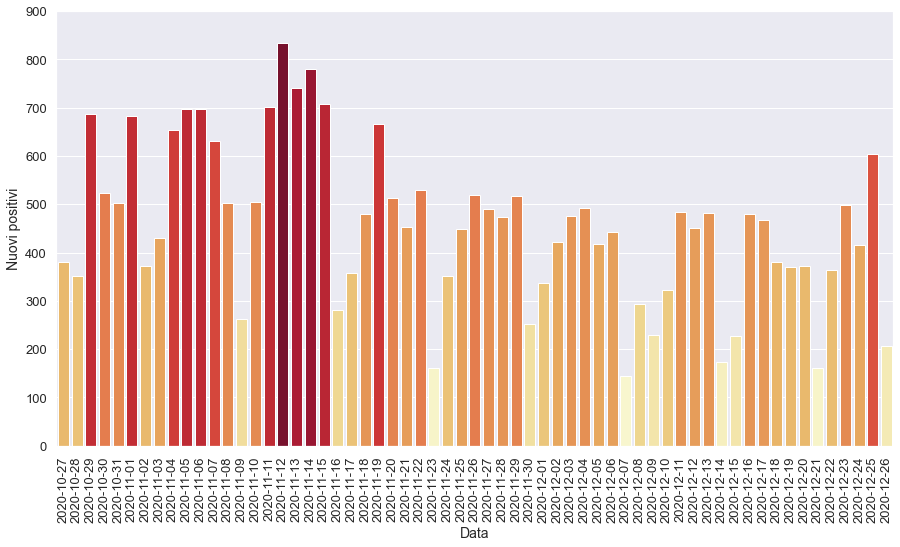

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

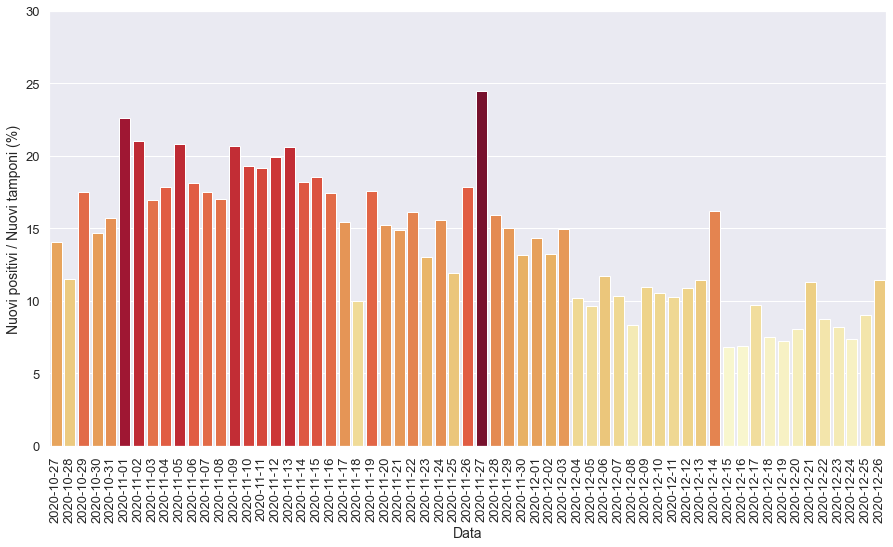

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

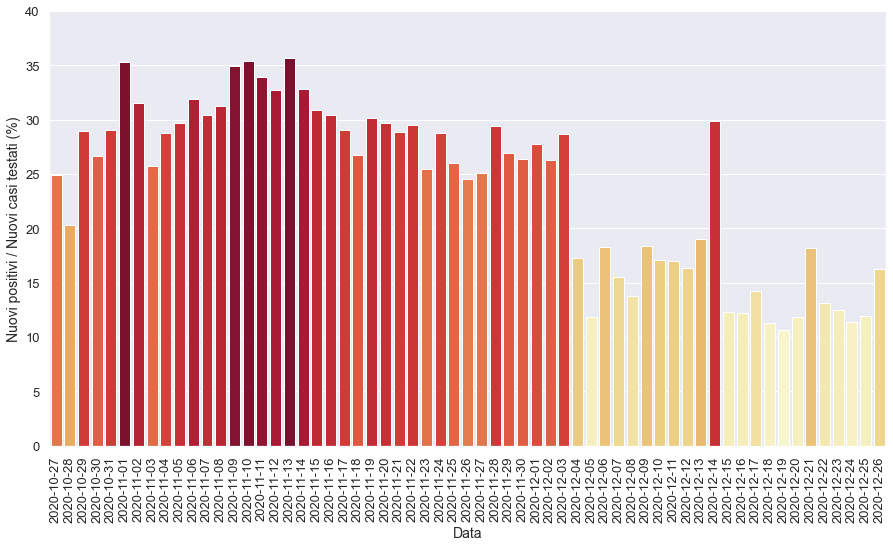

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

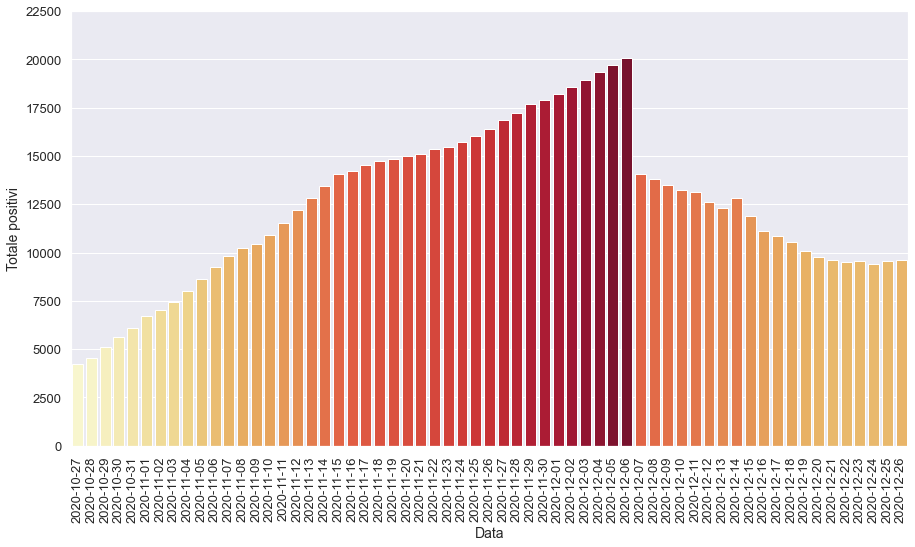

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

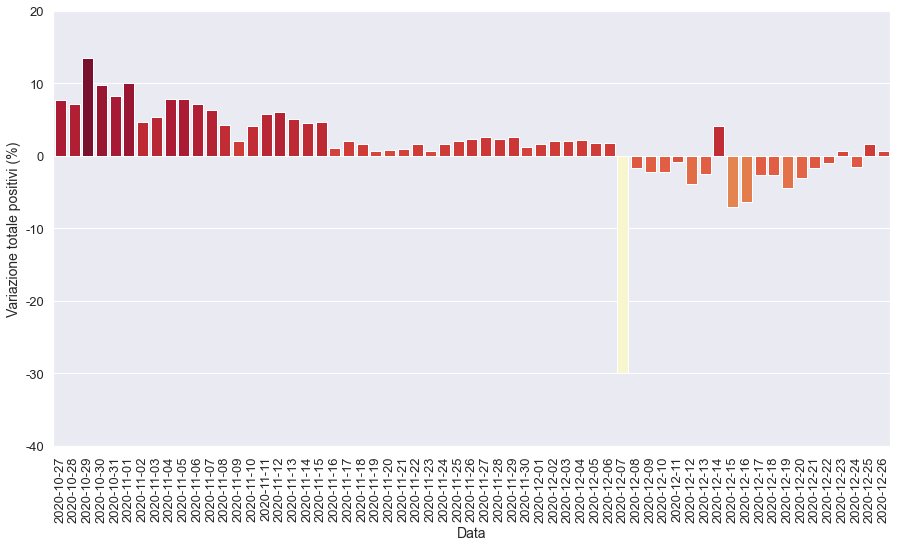

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

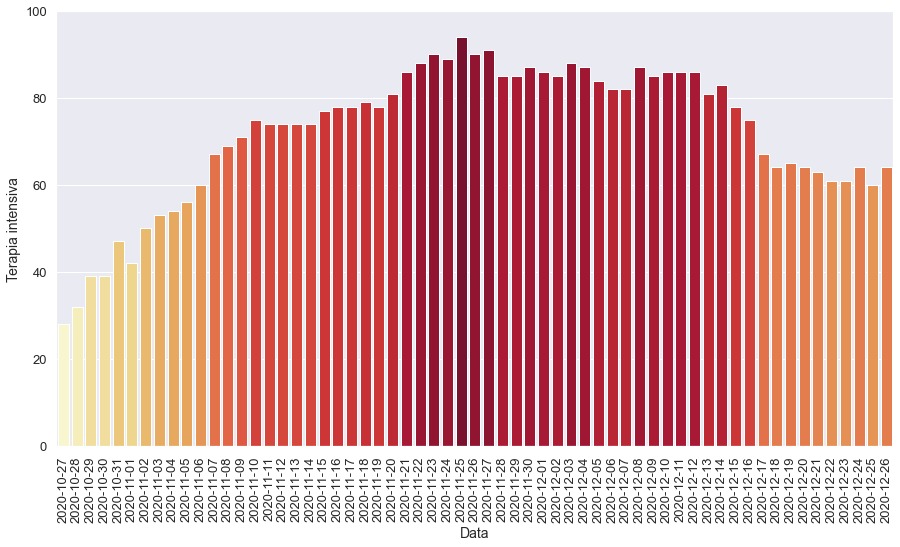

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

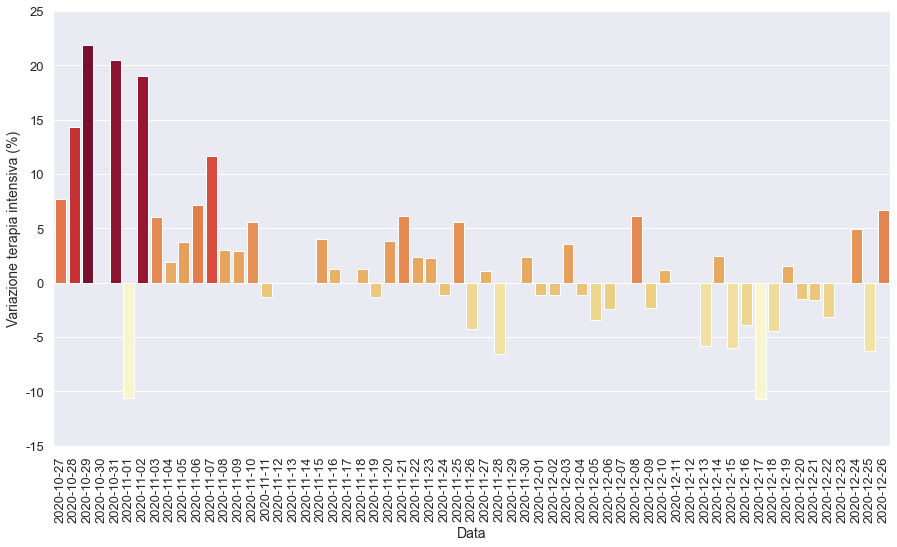

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

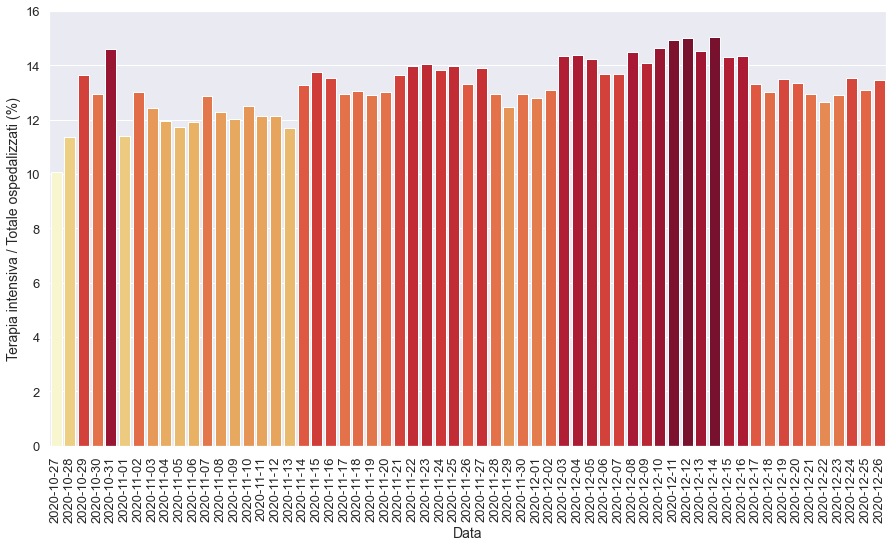

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

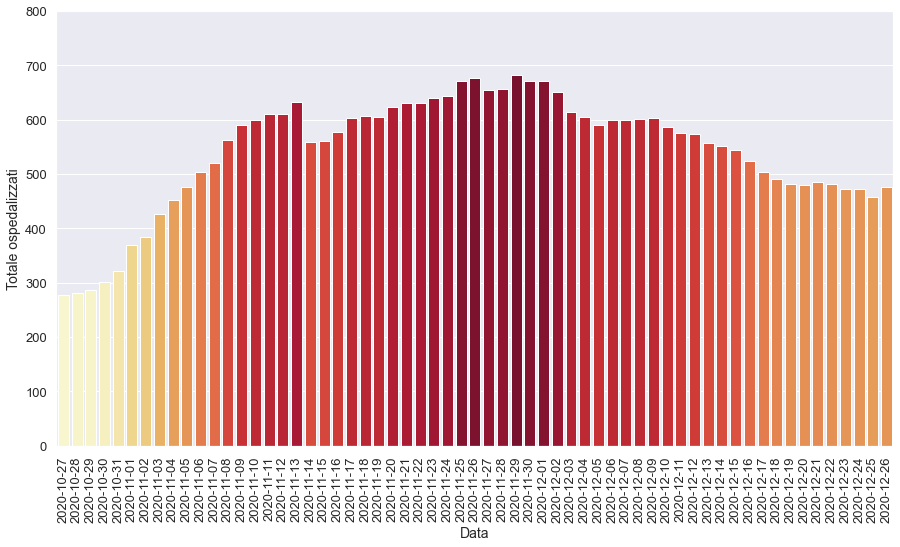

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

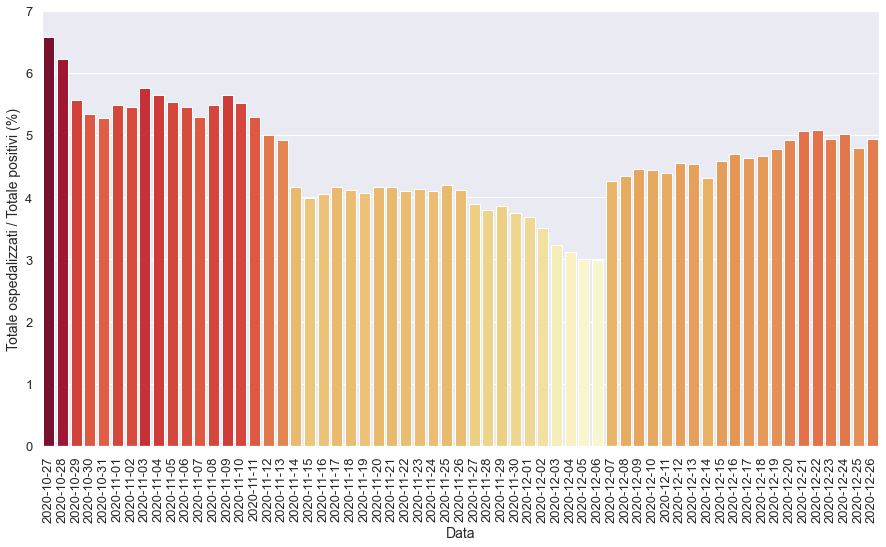

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

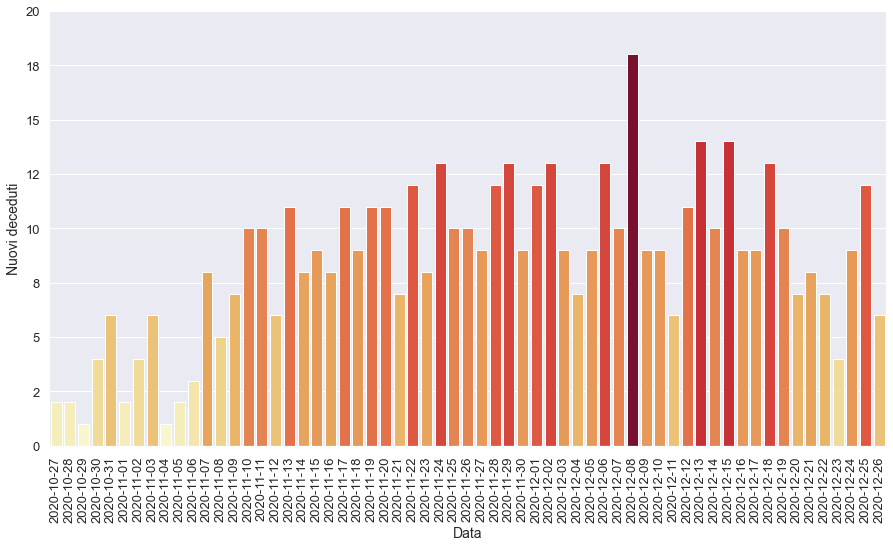

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

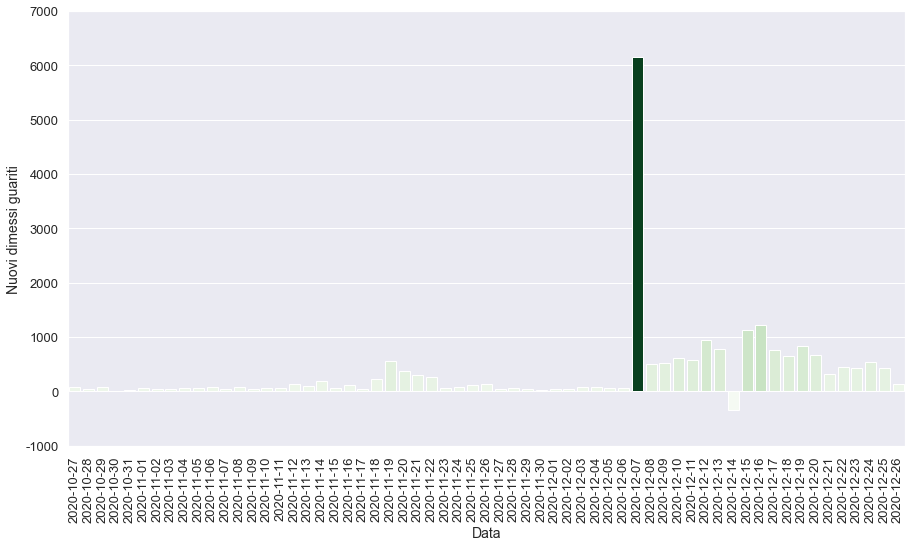

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-26T17:00:00,11,Marche,586,90,676,15733,16409,378,519,...,10.0,2905.0,2115.0,374.0,13.31,4.12,17.87,24.54,-4.26,2.36
1,2020-11-27T17:00:00,11,Marche,564,91,655,16188,16843,434,490,...,9.0,2001.0,1956.0,455.0,13.89,3.89,24.49,25.05,1.11,2.64
2,2020-11-28T17:00:00,11,Marche,571,85,656,16587,17243,400,473,...,12.0,2971.0,1610.0,399.0,12.96,3.80,15.92,29.38,-6.59,2.37
3,2020-11-29T17:00:00,11,Marche,598,85,683,17013,17696,453,518,...,13.0,3451.0,1921.0,426.0,12.45,3.86,15.01,26.97,0.00,2.63
4,2020-11-30T17:00:00,11,Marche,585,87,672,17244,17916,220,252,...,9.0,1913.0,955.0,231.0,12.95,3.75,13.17,26.39,2.35,1.24
5,2020-12-01T17:00:00,11,Marche,586,86,672,17532,18204,288,337,...,12.0,2349.0,1213.0,288.0,12.80,3.69,14.35,27.78,-1.15,1.61
6,2020-12-02T17:00:00,11,Marche,565,85,650,17919,18569,365,421,...,13.0,3180.0,1599.0,387.0,13.08,3.50,13.24,26.33,-1.16,2.01
7,2020-12-03T17:00:00,11,Marche,526,88,614,18335,18949,380,476,...,9.0,3178.0,1662.0,416.0,14.33,3.24,14.98,28.64,3.53,2.05
8,2020-12-04T17:00:00,11,Marche,518,87,605,18756,19361,412,492,...,7.0,4817.0,2847.0,421.0,14.38,3.12,10.21,17.28,-1.14,2.17
9,2020-12-05T17:00:00,11,Marche,506,84,590,19108,19698,337,418,...,9.0,4326.0,3515.0,352.0,14.24,3.00,9.66,11.89,-3.45,1.74


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

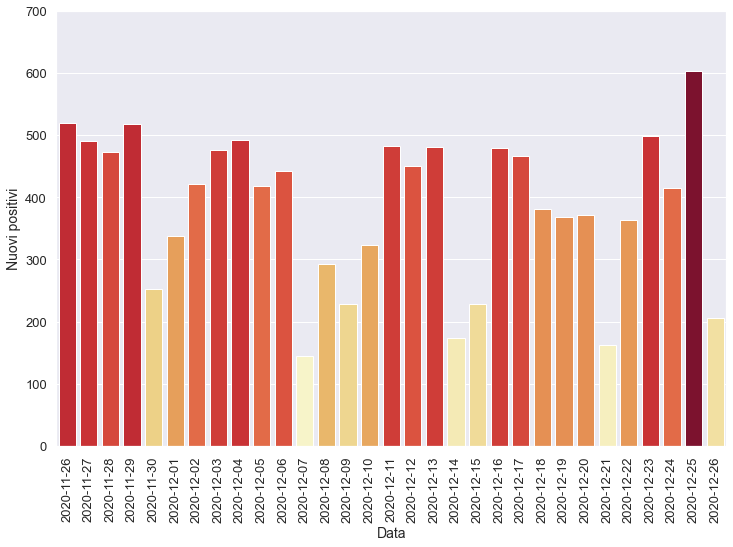

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

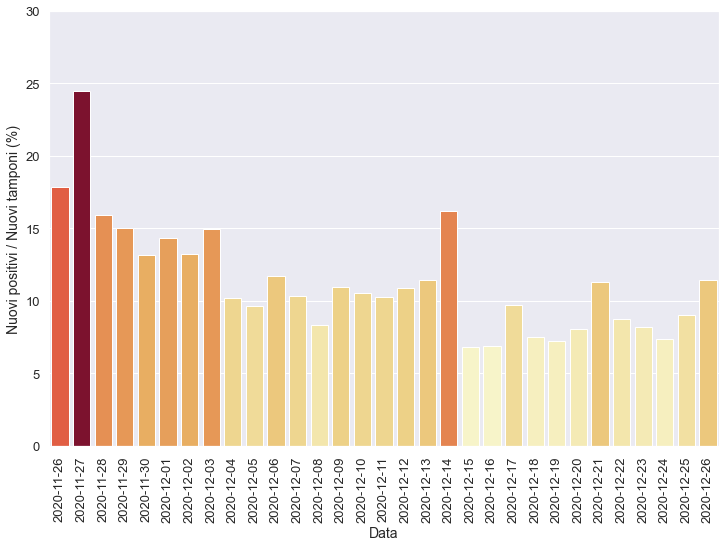

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

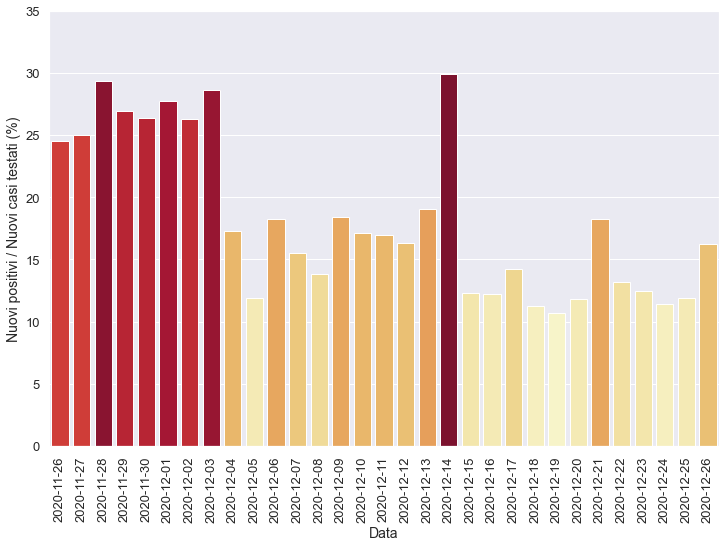

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

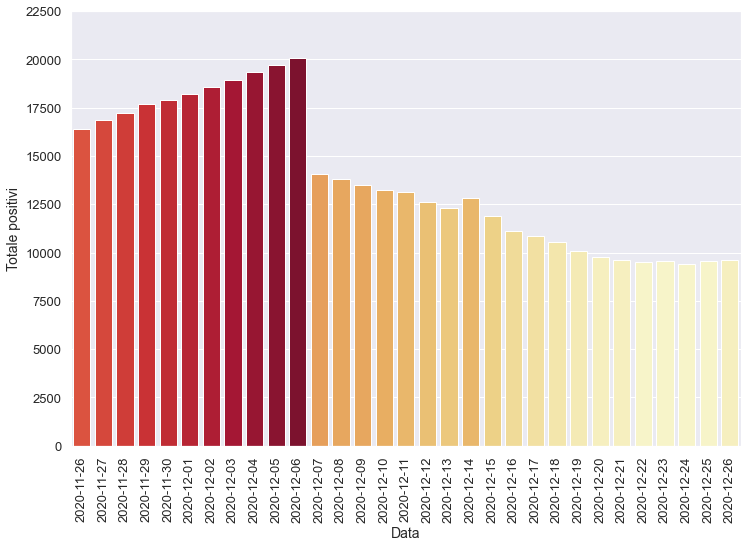

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

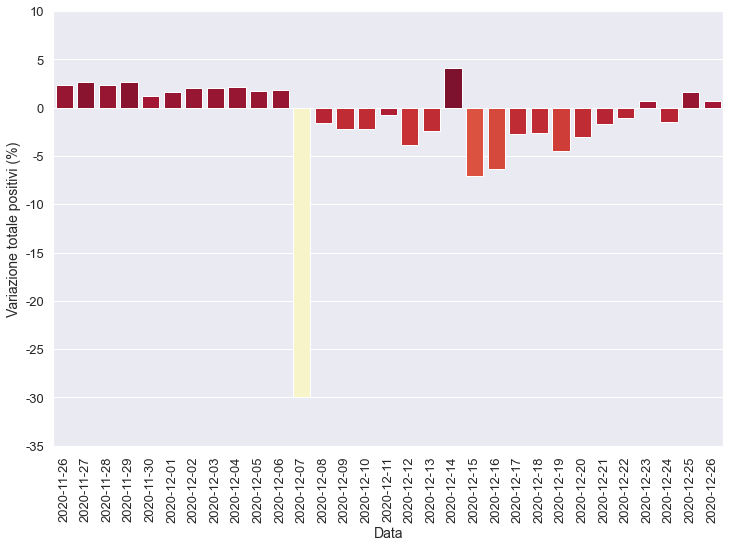

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

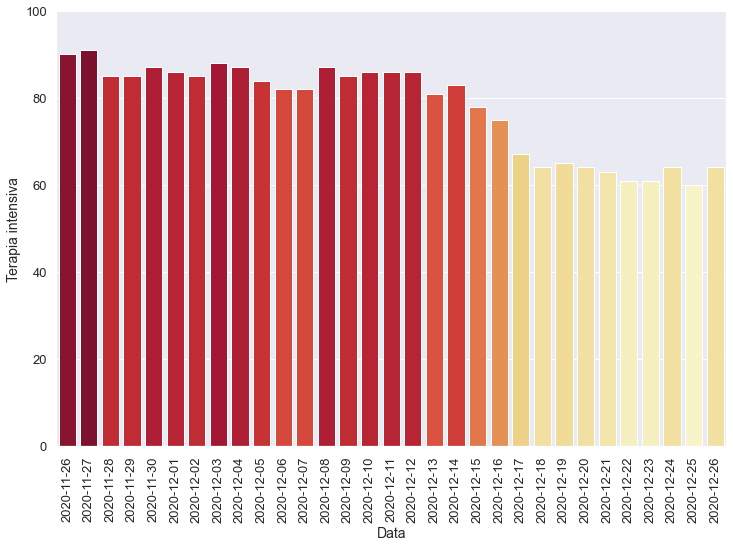

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

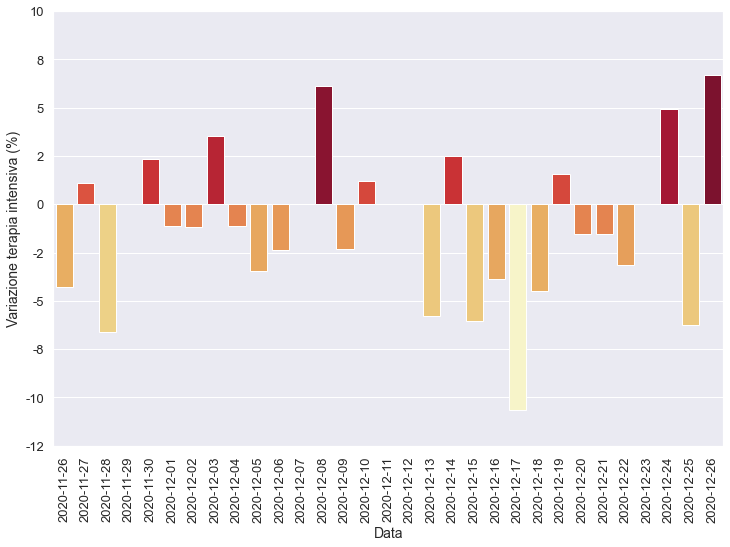

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

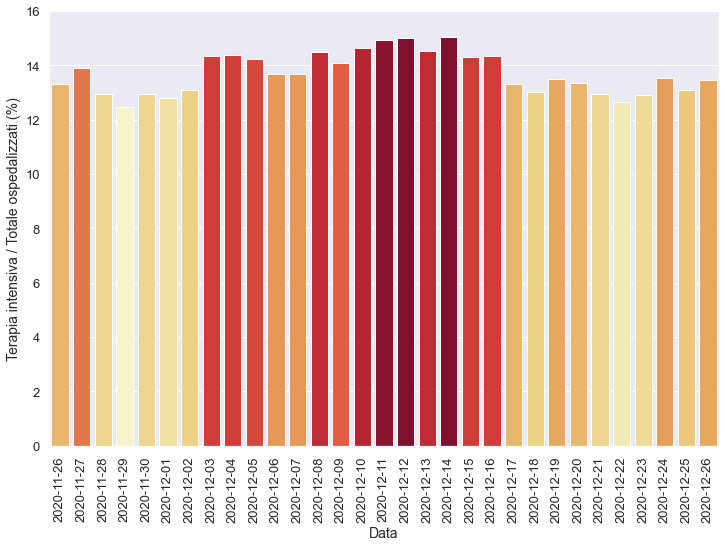

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

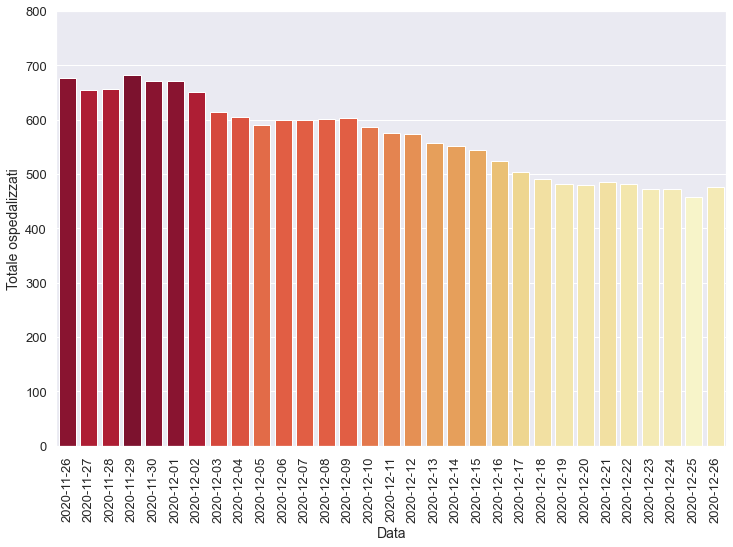

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

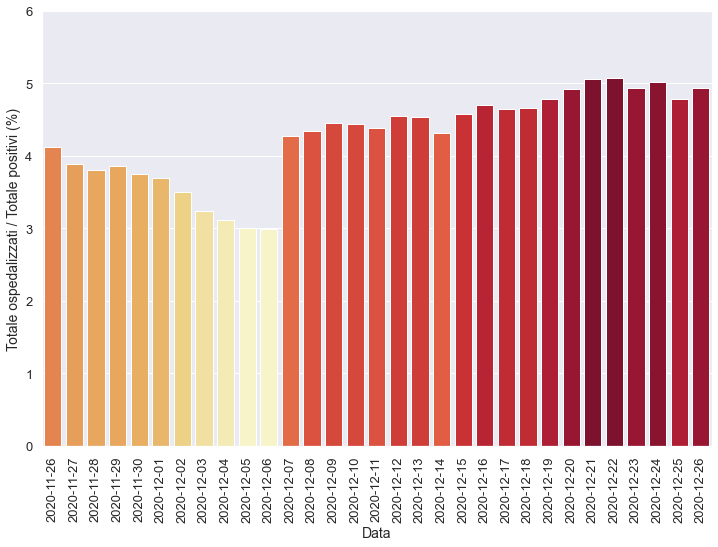

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

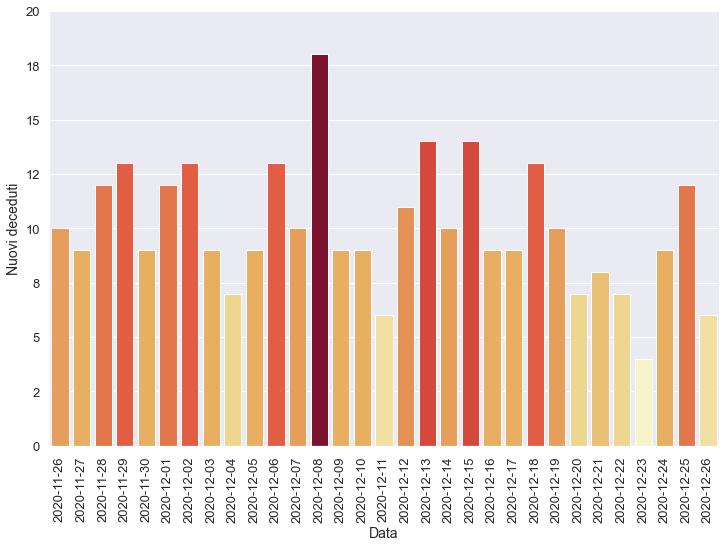

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

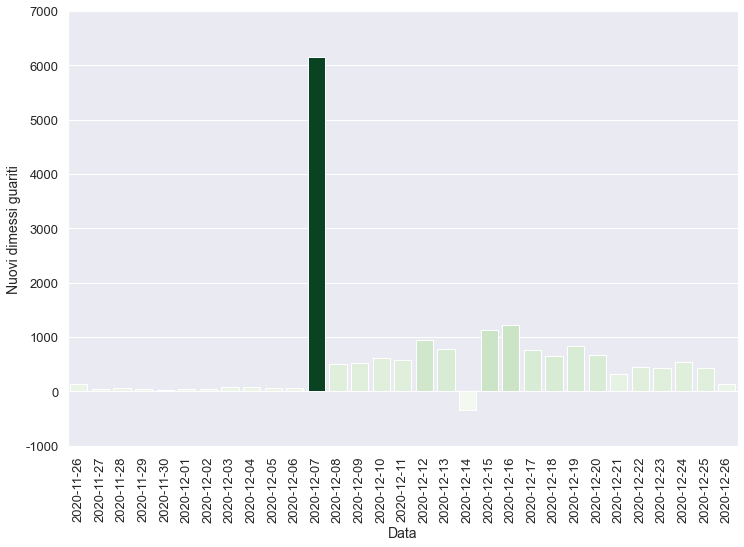

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-19T17:00:00,11,Marche,416,65,481,9589,10070,-472,369,...,10.0,5082.0,3460.0,-462.0,13.51,4.78,7.26,10.66,1.56,-4.48
1,2020-12-20T17:00:00,11,Marche,416,64,480,9281,9761,-309,372,...,7.0,4621.0,3144.0,-308.0,13.33,4.92,8.05,11.83,-1.54,-3.07
2,2020-12-21T17:00:00,11,Marche,423,63,486,9111,9597,-164,162,...,8.0,1434.0,889.0,-170.0,12.96,5.06,11.30,18.22,-1.56,-1.68
3,2020-12-22T17:00:00,11,Marche,421,61,482,9015,9497,-100,363,...,7.0,4162.0,2758.0,-96.0,12.66,5.08,8.72,13.16,-3.17,-1.04
4,2020-12-23T17:00:00,11,Marche,411,61,472,9087,9559,62,498,...,4.0,6090.0,3992.0,72.0,12.92,4.94,8.18,12.47,0.00,0.65
5,2020-12-24T17:00:00,11,Marche,409,64,473,8942,9415,-144,415,...,9.0,5613.0,3646.0,-145.0,13.53,5.02,7.39,11.38,4.92,-1.51
6,2020-12-25T17:00:00,11,Marche,398,60,458,9109,9567,152,603,...,12.0,6711.0,5062.0,167.0,13.10,4.79,8.99,11.91,-6.25,1.61
7,2020-12-26T17:00:00,11,Marche,412,64,476,9159,9635,68,206,...,6.0,1797.0,1270.0,50.0,13.45,4.94,11.46,16.22,6.67,0.71


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

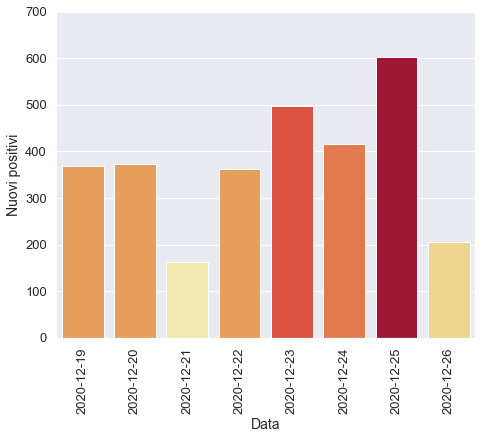

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

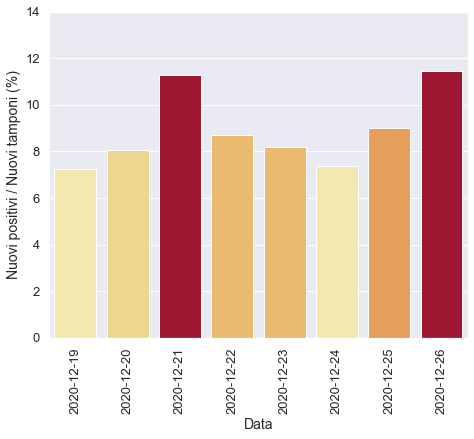

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

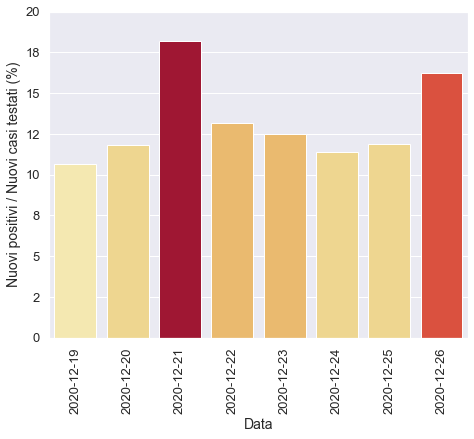

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

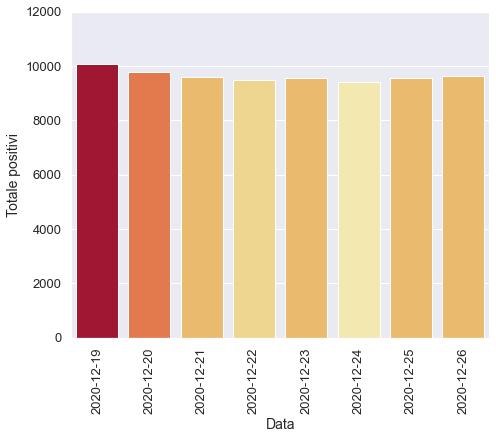

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

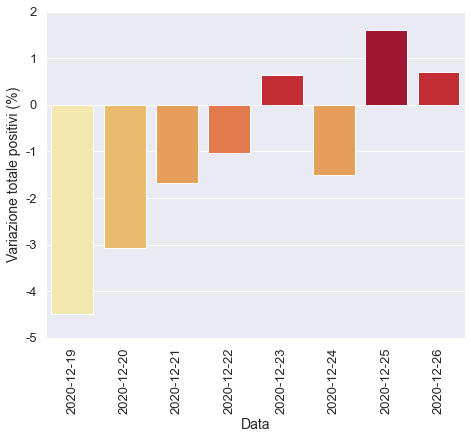

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

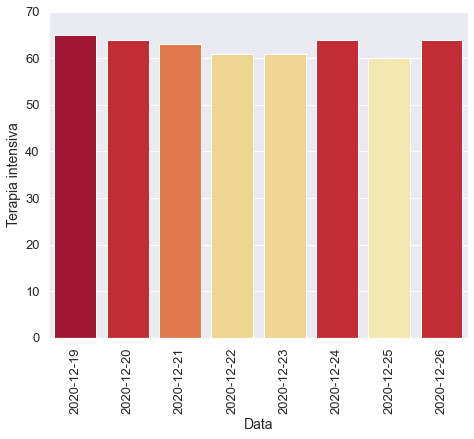

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

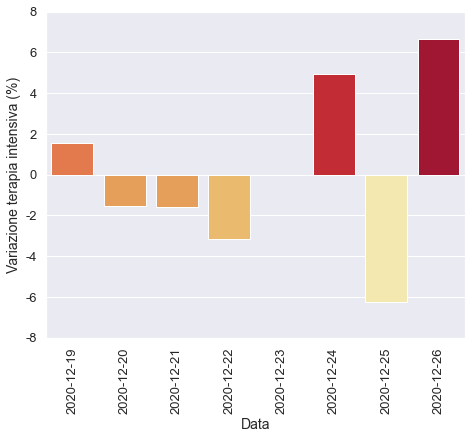

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

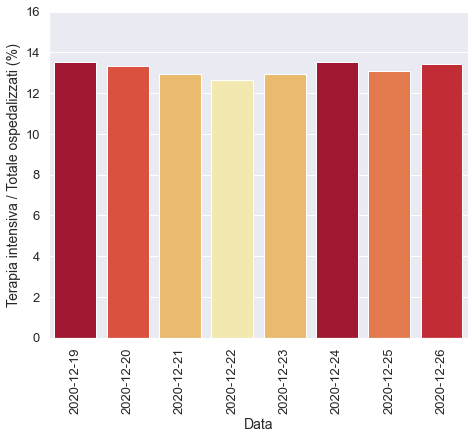

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

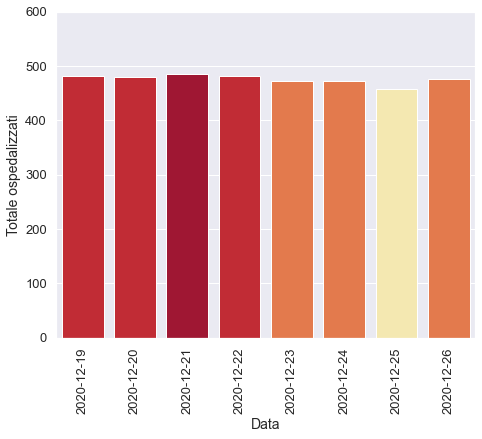

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

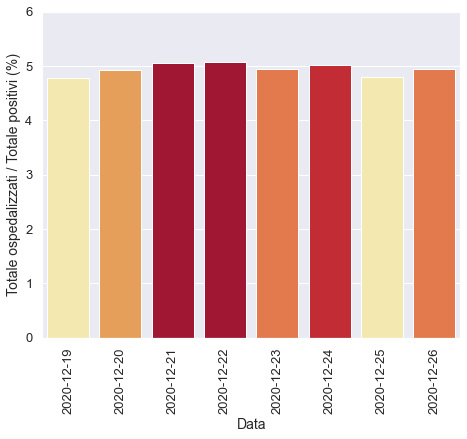

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

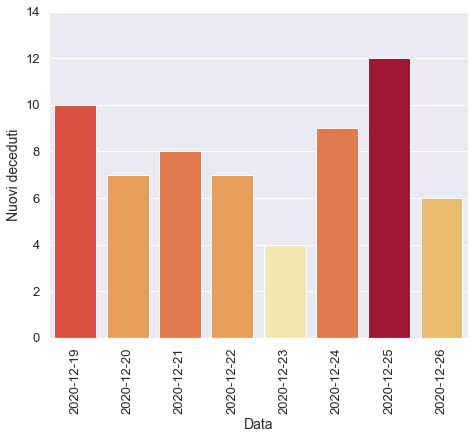

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

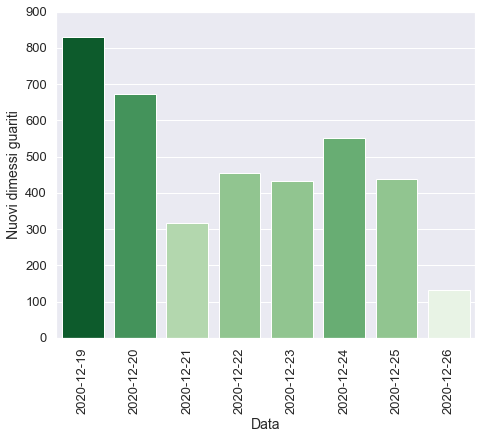

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)